# Marselo Software

### **MVP Overview and Future Vision**  

This project is currently in its **MVP (Minimum Viable Product)** stage, focusing on retrieving blockchain data using the Remix development network. The initial goal is to gather key on-chain metrics and understand how data can be extracted directly from the Ethereum network.  

### **Future Integration with Swaps for Token Insights**  

In the next phase, the idea is to **integrate decentralized exchanges (DEXs) and swaps** to retrieve real-time information about the most famous tokens in the Ethereum network. By leveraging DEX liquidity pools and price oracles, the system will be able to track token prices, volume, and liquidity movements dynamically.  

### **Evolution into an AI-Driven Agent**  

The long-term goal is to transform this system into an **AI-powered agent** capable of analyzing blockchain data, identifying trends, and providing intelligent insights. This AI agent will not only fetch token data but also detect patterns, predict market movements, and assist users in decision-making based on on-chain activity.  

By combining **blockchain analytics, decentralized finance (DeFi) data, and AI capabilities**, this project aims to create an advanced solution for token tracking and market intelligence in the Ethereum ecosystem.

## Imports

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Exploratory

In [ ]:
import json

json_data = '''{
  "call": {
    "from": "0x5B38Da6a701c568545dCfcB03FcB875f56beddC4",
    "to": "OnChainDataFetcher.getAllData(address)",
    "data": "0x67e...878ef",
    "execution_cost": "5440 gas",
    "input": {
      "address_account": "0x6090A6e47849629b7245Dfa1Ca21D94cd15878Ef"
    },
    "output": {
      "blockTime": 1739633935,
      "balance": 0,
      "gasPrice": 2,
      "difficulty": 0,
      "baseFee": 1,
      "gasLimit": 3000000,
      "blockHash": "0x2e80d0a115d7ef67f234405512ef5694c0e6bf7a61c7788fc8c7aa0f07c5dd4b",
      "miner": "0x8945A1288dc78A6D8952a92C77aEe6730B414778",
      "txOrigin": "0x5B38Da6a701c568545dCfcB03FcB875f56beddC4",
      "msgSender": "0x5B38Da6a701c568545dCfcB03FcB875f56beddC4"
    },
    "logs": [],
    "raw_logs": []
  },
  "functions": {
    "getBlockTimestamp": {
      "description": "Returns the current block timestamp.",
      "output": 1739633935
    },
    "getBalance": {
      "description": "Returns the balance of the provided account address.",
      "input": {
        "accounts": [
          "0x6090A6e47849629b7245Dfa1Ca21D94cd15878Ef"
        ]
      },
      "output": [
        0
      ]
    },
    "getGasPrice": {
      "description": "Returns the current gas price.",
      "output": 2
    },
    "getBlockDifficulty": {
      "description": "Returns the difficulty of the current block.",
      "output": 0
    },
    "getBaseFee": {
      "description": "Returns the base fee of the current block.",
      "output": 1
    },
    "getBlockGasLimit": {
      "description": "Returns the gas limit of the current block.",
      "output": 3000000
    },
    "getBlockHash": {
      "description": "Returns the block hash for the given block number.",
      "input": {
        "blockNumber": 1
      },
      "output": "0x2e80d0a115d7ef67f234405512ef5694c0e6bf7a61c7788fc8c7aa0f07c5dd4b"
    },
    "getBlockMiner": {
      "description": "Returns the miner address of the current block.",
      "output": "0x8945A1288dc78A6D8952a92C77aEe6730B414778"
    }
  }
}'''

data = json.loads(json_data)
print(json.dumps(data, indent=2))


{
  "call": {
    "from": "0x5B38Da6a701c568545dCfcB03FcB875f56beddC4",
    "to": "OnChainDataFetcher.getAllData(address)",
    "data": "0x67e...878ef",
    "execution_cost": "5440 gas",
    "input": {
      "address_account": "0x6090A6e47849629b7245Dfa1Ca21D94cd15878Ef"
    },
    "output": {
      "blockTime": 1739633935,
      "balance": 0,
      "gasPrice": 2,
      "difficulty": 0,
      "baseFee": 1,
      "gasLimit": 3000000,
      "blockHash": "0x2e80d0a115d7ef67f234405512ef5694c0e6bf7a61c7788fc8c7aa0f07c5dd4b",
      "miner": "0x8945A1288dc78A6D8952a92C77aEe6730B414778",
      "txOrigin": "0x5B38Da6a701c568545dCfcB03FcB875f56beddC4",
      "msgSender": "0x5B38Da6a701c568545dCfcB03FcB875f56beddC4"
    },
    "logs": [],
    "raw_logs": []
  },
  "functions": {
    "getBlockTimestamp": {
      "description": "Returns the current block timestamp.",
      "output": 1739633935
    },
    "getBalance": {
      "description": "Returns the balance of the provided account address.",
  

In [ ]:
data = json.loads(json_data)
output_data = data["call"]["output"]
df = pd.DataFrame([output_data])
print(df)

    blockTime  balance  gasPrice  difficulty  baseFee  gasLimit  \
0  1739633935        0         2           0        1   3000000   

                                           blockHash  \
0  0x2e80d0a115d7ef67f234405512ef5694c0e6bf7a61c7...   

                                        miner  \
0  0x8945A1288dc78A6D8952a92C77aEe6730B414778   

                                     txOrigin  \
0  0x5B38Da6a701c568545dCfcB03FcB875f56beddC4   

                                    msgSender  
0  0x5B38Da6a701c568545dCfcB03FcB875f56beddC4  


In [ ]:
df.head()

,blockTime,balance,gasPrice,difficulty,baseFee,gasLimit,blockHash,miner,txOrigin,msgSender
0,1739633935,0,2,0,1,3000000,0x2e80d0a115d7ef67f234405512ef5694c0e6bf7a61c7...,0x8945A1288dc78A6D8952a92C77aEe6730B414778,0x5B38Da6a701c568545dCfcB03FcB875f56beddC4,0x5B38Da6a701c568545dCfcB03FcB875f56beddC4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   blockTime   1 non-null      int64 
 1   balance     1 non-null      int64 
 2   gasPrice    1 non-null      int64 
 3   difficulty  1 non-null      int64 
 4   baseFee     1 non-null      int64 
 5   gasLimit    1 non-null      int64 
 6   blockHash   1 non-null      object
 7   miner       1 non-null      object
 8   txOrigin    1 non-null      object
 9   msgSender   1 non-null      object
dtypes: int64(6), object(4)
memory usage: 212.0+ bytes


In [ ]:
df.columns

Index(['blockTime', 'balance', 'gasPrice', 'difficulty', 'baseFee', 'gasLimit',
       'blockHash', 'miner', 'txOrigin', 'msgSender'],
      dtype='object')

## Graphs


**Analysis of Blockchain Data from Remix Development Network**

The generated graphs provide insights into key blockchain metrics, but it is important to highlight that these results are influenced by the fact that we are using the Remix development network, which differs from a live Ethereum mainnet or testnet environment.
Bar Chart - Blockchain Metrics (blockTime, balance, gasPrice, difficulty, baseFee, gasLimit)

  blockTime represents the timestamp of the mined block. Since we are on a local development network, the block time is nearly instantaneous.    difficulty is zero, indicating that Proof of Work (PoW) is not being used. This is expected in Ethereum’s Proof of Stake (PoS) environment or a development setup.
  gasLimit is predefined and static in Remix, unlike mainnet where it fluctuates based on network activity.

**Scatter Plot - GasPrice vs GasLimit**

  The relationship between gasPrice and gasLimit does not show real-world variation because Remix does not introduce dynamic gas adjustments.
  In a real blockchain environment, gas prices vary based on demand and network congestion, but in this case, the values remain constant.

**Block Hash Distribution**

  The blockHash values appear uniform because the Remix network generates blocks in a controlled and predictable manner.
  In a real blockchain network, block hashes would show more variability due to different transaction compositions and mining conditions.

**Miner Address Consistency**

  The miner address remains the same, which indicates that Remix is not simulating real mining pools or validator rotation as seen in Ethereum’s PoS network.
  On mainnet, this would vary as different validators or miners participate in block production.

**Conclusion**

The data visualized in these graphs highlights the controlled nature of the Remix development network. Since Remix is designed for smart contract testing, it does not reflect real-world Ethereum network conditions such as fluctuating gas prices, dynamic difficulty, or varied mining participants. For more realistic insights, deploying on a testnet like Goerli or Sepolia would provide data closer to mainnet behavior.

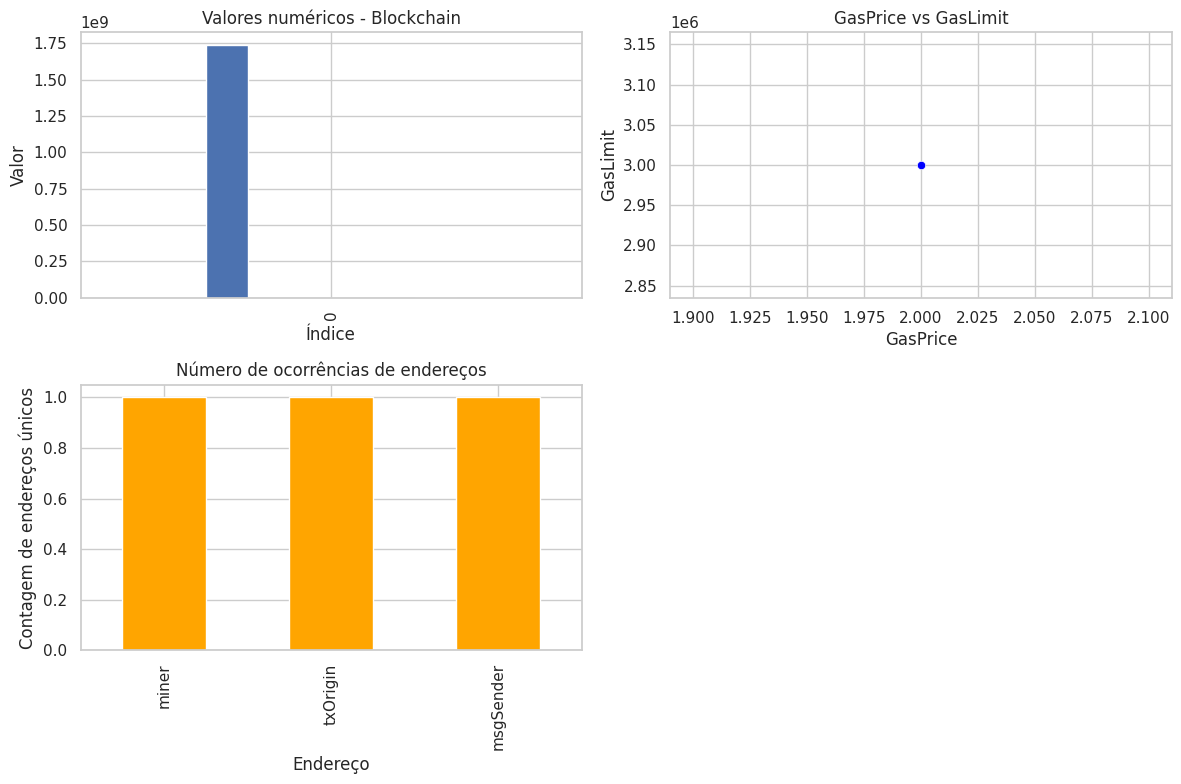

In [ ]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras para valores numéricos
numeric_columns = ['blockTime', 'balance', 'gasPrice', 'difficulty', 'baseFee', 'gasLimit']
df_numeric = df[numeric_columns]

# Plotando os gráficos
plt.figure(figsize=(12, 8))

# Gráfico de barras - Valores numéricos
plt.subplot(2, 2, 1)
df_numeric.plot(kind='bar', ax=plt.gca(), legend=False)
plt.title("Valores numéricos - Blockchain")
plt.xlabel("Índice")
plt.ylabel("Valor")

# Gráfico de dispersão para análise entre gasPrice e gasLimit
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['gasPrice'], y=df['gasLimit'], color='blue')
plt.title("GasPrice vs GasLimit")
plt.xlabel("GasPrice")
plt.ylabel("GasLimit")

# Gráfico de barras para outros dados como texto (ex.: miner, txOrigin)
plt.subplot(2, 2, 3)
df[['miner', 'txOrigin', 'msgSender']].nunique().plot(kind='bar', color='orange', ax=plt.gca())
plt.title("Número de ocorrências de endereços")
plt.xlabel("Endereço")
plt.ylabel("Contagem de endereços únicos")

plt.tight_layout()
plt.show()


## Models V1 (MVP)

### Linear regression GAS Prediction

In [ ]:
from sklearn.linear_model import LinearRegression

df['blockTimeDiff'] = df['blockTime'].diff().fillna(0)
X = df[['gasLimit', 'baseFee', 'difficulty']]
y = df['gasPrice']

model = LinearRegression()
model.fit(X, y)

print("Modelo treinado com sucesso!")



Modelo treinado com sucesso!


In [ ]:
# Exibir coeficientes e intercepto
print("Modelo treinado com sucesso!")
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Interpretar a importância de cada variável
features = X.columns
for feature, coef in zip(features, model.coef_):
    print(f"A cada aumento de 1 unidade em {feature}, o gasPrice muda em {coef:.4f} unidades.")


Modelo treinado com sucesso!
Coeficientes: [0. 0. 0.]
Intercepto: 2.0
A cada aumento de 1 unidade em gasLimit, o gasPrice muda em 0.0000 unidades.
A cada aumento de 1 unidade em baseFee, o gasPrice muda em 0.0000 unidades.
A cada aumento de 1 unidade em difficulty, o gasPrice muda em 0.0000 unidades.


### Network Congestion Classification (Random Forest)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Adicionar mais dados ao DataFrame ou apenas testar com o seu exemplo
df['congestion'] = pd.cut(df['gasPrice'], bins=[0, 20, 50, 200], labels=[0, 1, 2])

X = df[['gasPrice', 'gasLimit', 'baseFee']]
y = df['congestion']

# Verifique se você tem mais de uma amostra. Caso contrário, use todos os dados para treino.
if len(df) > 1:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train = X
    y_train = y
    X_test = X
    y_test = y

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Como você tem apenas uma amostra, o modelo pode não ser significativo, mas você pode fazer a previsão.
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



### Block Mining Time Prediction (Linear Regression)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supondo que você tenha o DataFrame df
# Criando a coluna blockTimeDiff com a diferença dos tempos
df['blockTimeDiff'] = df['blockTime'].diff().fillna(0)

# Selecionando as variáveis independentes (X) e dependente (y)
X = df[['gasPrice', 'difficulty', 'gasLimit']]
y = df['blockTimeDiff']

# Treinando o modelo de regressão linear com todos os dados disponíveis
model = LinearRegression()
model.fit(X, y)

# Realizando a predição
predictions = model.predict(X)

# Calculando o erro quadrático médio (Mean Squared Error)
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0


### Anomaly Detection in Ethereum Transactions (Isolation Forest)

In [ ]:
sim_data = {
    'blockTime': np.random.randint(1700000000, 1750000000, size=100),
    'balance': np.random.randint(0, 1000, size=100),
    'gasPrice': np.random.randint(10, 100, size=100),
    'difficulty': np.random.randint(0, 10, size=100),
    'baseFee': np.random.randint(1, 10, size=100),
    'gasLimit': np.random.randint(1000000, 10000000, size=100),
    'blockHash': ['0x' + ''.join(np.random.choice(list('0123456789abcdef'), size=64)) for _ in range(100)],  # Hashs aleatórios
    'miner': ['0x' + ''.join(np.random.choice(list('0123456789abcdef'), size=40)) for _ in range(100)],  # Mineradores aleatórios
    'txOrigin': ['0x' + ''.join(np.random.choice(list('0123456789abcdef'), size=40)) for _ in range(100)],  # Origem de transação aleatória
    'msgSender': ['0x' + ''.join(np.random.choice(list('0123456789abcdef'), size=40)) for _ in range(100)]  # Envio de mensagem aleatório
}

df_sim = pd.DataFrame(sim_data)

df_sim['blockTimeDiff'] = df_sim['blockTime'].diff().fillna(0)
df_sim['congestion'] = pd.cut(df_sim['gasPrice'], bins=[0, 20, 50, 200], labels=[0, 1, 2])

print(df_sim.head())


    blockTime  balance  gasPrice  difficulty  baseFee  gasLimit  \
0  1736066527      306        85           3        9   7242316   
1  1737188143      449        30           2        9   6172967   
2  1722941001      216        73           4        3   8467713   
3  1714919587      902        87           8        1   9994619   
4  1710136750      474        39           3        6   5077932   

                                           blockHash  \
0  0x6b51de3e1f1d1ecb6a2ee99875c8bcb53512de13f9f9...   
1  0xdd0f0828dc927b4b059c868082055f2036e29889c910...   
2  0x536e2fa5a509816c5a86bb7b16c5eb4f536da67f7ad0...   
3  0x0f3b1b4985cf9365a50b63baf16075472bc4393faa8e...   
4  0x062c29c754a5e3f1ed05ed1cc2c42edf232b9f96c894...   

                                        miner  \
0  0x56a70d29ae8beff1b308e6098019da30aeaafa04   
1  0xf76df1d966186eb325da5dfb88c8ab7153ecd34a   
2  0x520192196ce84983ead08e7a9fce5d77ee456709   
3  0xd8a719dee2ae45b7a01fe54ae0d1b7fd637101ef   
4  0x48253f1265